In [22]:
import pandas as pd

In [23]:
df=pd.read_csv("diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [24]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.isnull()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df.isnull().sum().sum()

np.int64(0)

In [28]:
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

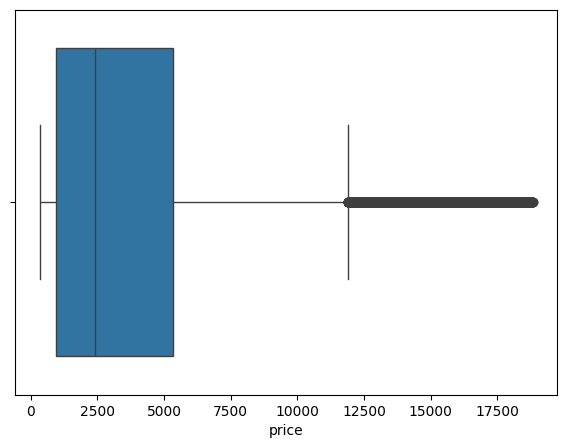

In [31]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['price'])
plt.show()

In [32]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [ ]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
print(q1)
print(q3)

950.0
5324.25


In [34]:
iqr=q3-q1
iqr

np.float64(4374.25)

In [35]:
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
print(upper_bound)
print(lower_bound)

11885.625
-5611.375


In [36]:
d=df[~((df['price']>=(q1-1.5*iqr))&(df['price']<=(q3+1.5*iqr)))]

In [37]:
df.drop(columns=['x'],inplace=True)
df.drop(columns=['y'],inplace=True)
df.drop(columns=['z'],inplace=True)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,326
1,2,0.21,Premium,E,SI1,59.8,61.0,326
2,3,0.23,Good,E,VS1,56.9,65.0,327
3,4,0.29,Premium,I,VS2,62.4,58.0,334
4,5,0.31,Good,J,SI2,63.3,58.0,335


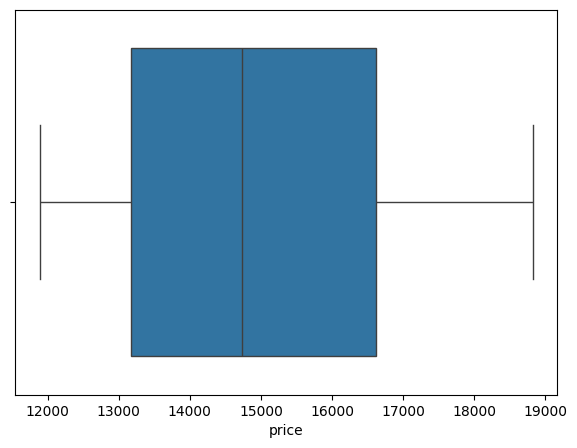

In [38]:
plt.figure(figsize=(7,5))
sns.boxplot(x=d['price'])
plt.show()

In [39]:
a=df.drop(['price'],axis=1)
b=df['price']
print(a)
print(b)

       Unnamed: 0  carat        cut color clarity  depth  table
0               1   0.23      Ideal     E     SI2   61.5   55.0
1               2   0.21    Premium     E     SI1   59.8   61.0
2               3   0.23       Good     E     VS1   56.9   65.0
3               4   0.29    Premium     I     VS2   62.4   58.0
4               5   0.31       Good     J     SI2   63.3   58.0
...           ...    ...        ...   ...     ...    ...    ...
53935       53936   0.72      Ideal     D     SI1   60.8   57.0
53936       53937   0.72       Good     D     SI1   63.1   55.0
53937       53938   0.70  Very Good     D     SI1   62.8   60.0
53938       53939   0.86    Premium     H     SI2   61.0   58.0
53939       53940   0.75      Ideal     D     SI2   62.2   55.0

[53940 rows x 7 columns]
0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64


In [40]:
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()                #this is used for normalize the dataset
T=mc.fit_transform(a)
print(T)

ValueError: could not convert string to float: 'Ideal'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=25)
model=LinearRegression()
model.fit(a_train,b_train)
b_pred=model.predict(a_test)
print(b_pred)

[1371.70085484 3124.86999811  267.0677796  ... 5713.69705304 8021.20327582
 5149.72983563]


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(b_test,b_pred)
print(r2)

0.8847575124594814


In [ ]:
model=LinearRegression()
model.fit(a_test,b_test)
b_pred=model.predict(a_test)
print(b_pred)

[1357.8054586  3060.79888373  285.81913266 ... 5718.03616897 8010.17514793
 5191.69633799]


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(b_test,b_pred)
print(r2)

0.8848641207851229
